In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from somefunc import *
%load_ext autoreload
%autoreload 2

images_path = "data/images"

In [9]:
df = pd.read_csv('data/cleaned_by_etienne.csv')
df["product_category_tree"] = df["product_category_tree"].apply(clean_categ)
df['path_file'] = df["uniq_id"].apply(get_path_file)
df['categ_0'] = df["product_category_tree"].apply(get_subcateg, deepness = 0)
df['categ_1'] = df["product_category_tree"].apply(get_subcateg, deepness = 1)
df['categ_2'] = df["product_category_tree"].apply(get_subcateg, deepness = 2)
# df['categ_3'] = df["product_category_tree"].apply(get_subcateg, deepness = 3)
df.drop(columns=['crawl_timestamp','product_url','pid', 'retail_price', 'discounted_price',
'image','is_FK_Advantage_product','product_rating','overall_rating','brand','product_specifications','uniq_id'],inplace=True)

categ_0_names = df.categ_0.unique()

lala
lala
lala


<AxesSubplot:>

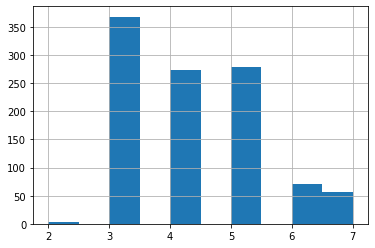

In [5]:
df['categ_list'] = df["product_category_tree"].apply(get_subcateg)
df['categ_list'].apply(len).hist()

In [6]:
(df['categ_1'].value_counts()==1).sum()

16

In [7]:
len(df['categ_1'].unique())

62

In [16]:
df['categ_2'].unique().tolist()

['Curtains',
 'Baby Bath Towels',
 'Bedsheets',
 'Maserati Time Wrist Watches',
 'Camerii Wrist Watches',
 'T STAR Wrist Watches',
 'Alfajr Wrist Watches',
 'TAG Heuer Wrist Watches',
 'Calibro Wrist Watches',
 'Cartier Wrist Watches',
 'Lois Caron Wrist Watches',
 'Titan Wrist Watches',
 'Srushti Art Jewelry Wrist Watches',
 'Escort Wrist Watches',
 'Jack klein Wrist Watches',
 'North Moon Wrist Watches',
 'Franck Bella Wrist Watches',
 'Ridas Wrist Watches',
 'Skmei Wrist Watches',
 'Now Wrist Watches',
 'fastrack Wrist Watches',
 'Disney Wrist Watches',
 'Vizion Wrist Watches',
 'Elantra Wrist Watches',
 'Marvel Wrist Watches',
 'Lenco Wrist Watches',
 "D'Signer Wrist Watches",
 'Diwan Sets',
 'Duvet Covers',
 'Bath Mats',
 'Home Fragrances',
 'Jug, Glass & Tray Sets',
 'Bulbs',
 'JMD Printed Cushions Cover (Pack of 2, 40 cm*40 ...',
 "Baby Girls' Clothes",
 "Kripa's Printed Cushions Cover (Pack of 2, 45 cm...",
 'Conditioners',
 'AKUP Coffee Mugs',
 'Routers',
 'Keyboards',
 'Casse

In [4]:
df['product_category_tree'].values()

0       Home Furnishing >> Curtains & Accessories >> C...
1       Baby Care >> Baby Bath & Skin >> Baby Bath Tow...
2       Baby Care >> Baby Bath & Skin >> Baby Bath Tow...
3       Home Furnishing >> Bed Linen >> Bedsheets >> S...
4       Home Furnishing >> Bed Linen >> Bedsheets >> J...
                              ...                        
1045    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
1046    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
1047    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
1048    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
1049    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
Name: product_category_tree, Length: 1050, dtype: object

In [73]:
images_list = get_img_list(df.path_file.values)
categ_0_list_num, categ_0_names= pd.factorize(df['categ_0'])
categ_0_list_hot =  tf.keras.utils.to_categorical(categ_0_list_num, num_classes=len(categ_0_names))

categ_1_list_num, categ_1_names= pd.factorize(df['categ_1'])
categ_1_list_hot =  tf.keras.utils.to_categorical(categ_1_list_num, num_classes=len(categ_1_names))

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_0, y_val_0 = train_test_split(images_list, categ_0_list_hot, test_size=0.1, random_state=42)
X_train, X_val, y_train_1, y_val_1 = train_test_split(images_list, categ_1_list_hot, test_size=0.1, random_state=42)

Baby Care
Baby Bath & Skin


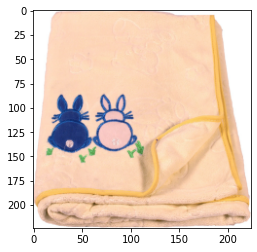

In [97]:
import numpy as np
num = 9
lala =  np.argmax(y_train_0[num])
print(categ_0_names[lala])
lulu =  np.argmax(y_train_1[num])
print(categ_1_names[lulu])
plt.imshow(X_train[num])

In [100]:
# ds = tf.data.Dataset.from_tensor_slices((images_list, categ_0_list_hot))

ds_train_X = tf.data.Dataset.from_tensor_slices((X_train))
ds_train_y = tf.data.Dataset.from_tensor_slices((y_train_0, y_train_1))
ds_train = tf.data.Dataset.zip((ds_train_X, ds_train_y))


ds_val_X = tf.data.Dataset.from_tensor_slices((X_val))
ds_val_y = tf.data.Dataset.from_tensor_slices((y_val_0, y_val_1))
ds_val = tf.data.Dataset.zip((ds_val_X, ds_val_y))



In [101]:
BATCH_SIZE=16
ds_train = ds_train.batch(BATCH_SIZE)
# .prefetch( tf.data.AUTOTUNE)
ds_val  = ds_val.batch(BATCH_SIZE)

In [102]:
image_batch,label_batch = next(iter(ds_train))
label_batch

(<tf.Tensor: shape=(16, 7), dtype=float32, numpy=
 array([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(16, 62), dtype=float32, numpy=
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [95]:
label_batch

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [113]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
from tensorflow.keras.models import Model
IMG_SIZE = 224
base_model = EfficientNetB0(include_top=True, weights="imagenet")
base_model = Model(base_model.inputs, base_model.layers[-2].output)

model_img_in = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
temp_out = base_model(model_img_in)


manager_cat_0 = layers.Dense(128,activation='relu')(temp_out)
model_out_cat_0 = layers.Dense(7,activation='softmax', name='out_cat_0')(manager_cat_0)

manager_cat_1 = layers.Dense(128,activation='relu')(temp_out)
mixer_cat_1 = layers.Concatenate()([manager_cat_0, manager_cat_1])
post_mixer_cat_1 = layers.Dense(128,activation='relu')(mixer_cat_1)
model_out_cat_1 = layers.Dense(62,activation='softmax', name='out_cat_1')(manager_cat_1)


model_effnet = tf.keras.Model(inputs=model_img_in, outputs=[model_out_cat_0,model_out_cat_1])

# model_test = tf.keras.Model(inputs=model_img_in, outputs=mixer_cat_1)

In [ ]:
# tf.keras.layers.Concatenate()([x1, x2])

In [114]:
model_effnet.compile(optimizer="adam", loss=["categorical_crossentropy","categorical_crossentropy"],loss_weights=[0.6, 0.4], metrics=["accuracy"])
# model_test.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [65]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# es = EarlyStopping(mode='min', monitor='val_loss', patience=10, verbose=0)
rl = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=4,verbose=1,mode="min",min_lr=0.00001)

In [116]:
history = model_effnet.fit(ds_train,
                            epochs = 25,
                            validation_data=ds_val,
                            # sample_weight={'out_cat_0': 0.6, 'out_cat_1': 0.4}
                            # callbacks=[rl]
                            # steps_per_epoch=50,
                            # validation_steps = 5
                            )

Epoch 1/25
60/60 [==============================] - 10s 106ms/step - loss: 3.5450 - out_cat_0_loss: 1.0434 - out_cat_1_loss: 2.5016 - out_cat_0_accuracy: 0.6455 - out_cat_1_accuracy: 0.4741 - val_loss: 3.0871 - val_out_cat_0_loss: 0.8213 - val_out_cat_1_loss: 2.2658 - val_out_cat_0_accuracy: 0.7143 - val_out_cat_1_accuracy: 0.5429
Epoch 2/25
60/60 [==============================] - 6s 95ms/step - loss: 1.5132 - out_cat_0_loss: 0.3843 - out_cat_1_loss: 1.1288 - out_cat_0_accuracy: 0.8720 - out_cat_1_accuracy: 0.7206 - val_loss: 2.9678 - val_out_cat_0_loss: 0.9305 - val_out_cat_1_loss: 2.0373 - val_out_cat_0_accuracy: 0.7429 - val_out_cat_1_accuracy: 0.6000
Epoch 3/25
60/60 [==============================] - 6s 94ms/step - loss: 0.7891 - out_cat_0_loss: 0.1921 - out_cat_1_loss: 0.5971 - out_cat_0_accuracy: 0.9407 - out_cat_1_accuracy: 0.8550 - val_loss: 2.8499 - val_out_cat_0_loss: 0.8030 - val_out_cat_1_loss: 2.0469 - val_out_cat_0_accuracy: 0.8095 - val_out_cat_1_accuracy: 0.6286
Epoch

In [67]:
results = model_test.predict(image_batch)

1/1 [==============================] - 1s 567ms/step


In [68]:
results.shape

(16, 256)

In [69]:
toto = results[0]

In [57]:
tf.keras.layers.LayerNormalization()(toto)

<tf.Tensor: shape=(1280,), dtype=float32, numpy=
array([ 0.9934341 , -0.54822373, -0.50203156, ...,  0.38839385,
        1.302862  , -0.6654497 ], dtype=float32)>

In [113]:
#  model_effnet.save('models/ model_effnet01.h5')

In [143]:
image_batch,label_batch = next(iter(ds_val))

results = model_effnet.predict(image_batch)

1/1 [==============================] - 0s 19ms/step


Computers
Laptop Accessories


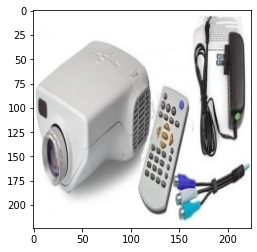

In [147]:
import numpy as np
num = 7
lala0 =  np.argmax(results[0][num])
lala1 =  np.argmax(results[1][num])




lulu =  np.argmax(y_train_1[num])

print(categ_0_names[lala0])
print(categ_1_names[lala1])

plt.imshow(image_batch[num])